<a href="https://colab.research.google.com/github/yerinsally/4J/blob/main/2_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 자료 불러오기 및 간단한 시각화

In [2]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4J/train.csv')
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25383 entries, 0 to 25382
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25383 non-null  object 
 1   danceability      25383 non-null  float64
 2   energy            25383 non-null  float64
 3   key               25383 non-null  int64  
 4   loudness          25383 non-null  float64
 5   speechiness       25383 non-null  float64
 6   acousticness      25383 non-null  float64
 7   instrumentalness  25383 non-null  float64
 8   liveness          25383 non-null  float64
 9   valence           25383 non-null  float64
 10  tempo             25383 non-null  float64
 11  duration          25383 non-null  int64  
 12  genre             25383 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB


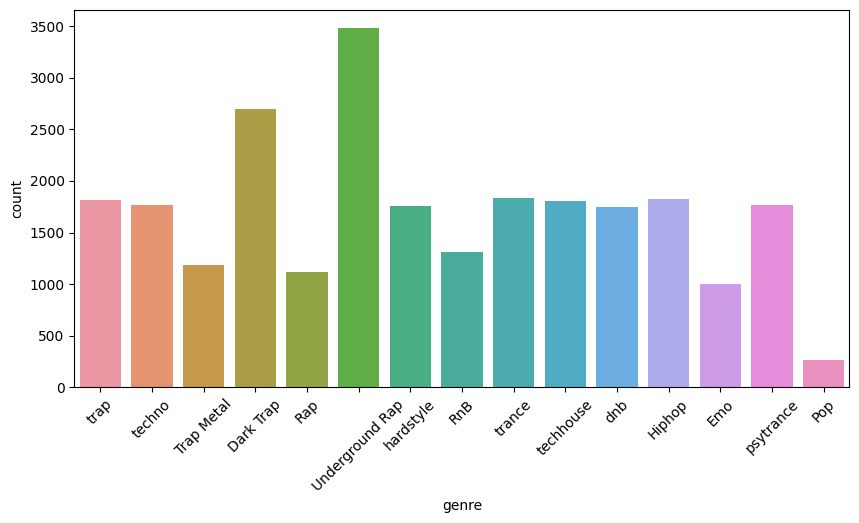

In [5]:
# target인 genre 분포 간단한 시각화
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

sns.countplot(x = train['genre'])
plt.xticks(rotation = 45)
plt.show()

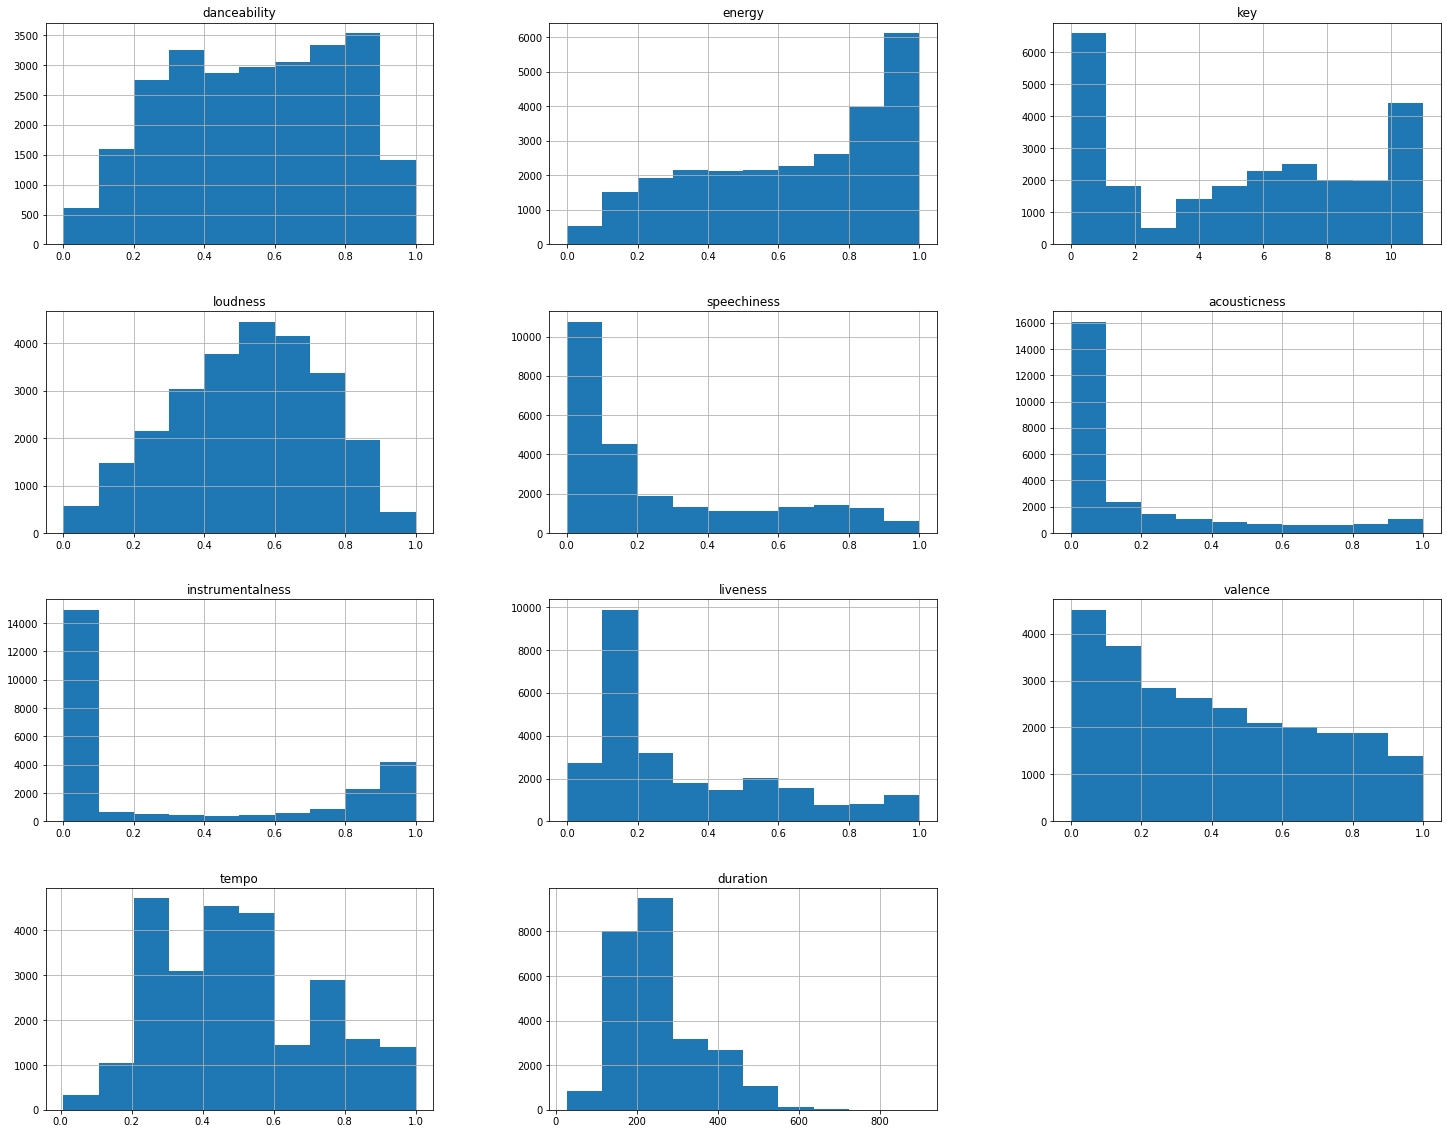

In [6]:
# feature 분포 확인
plt.rcParams['figure.figsize'] = [20, 10]
train.hist(figsize=(25,20));

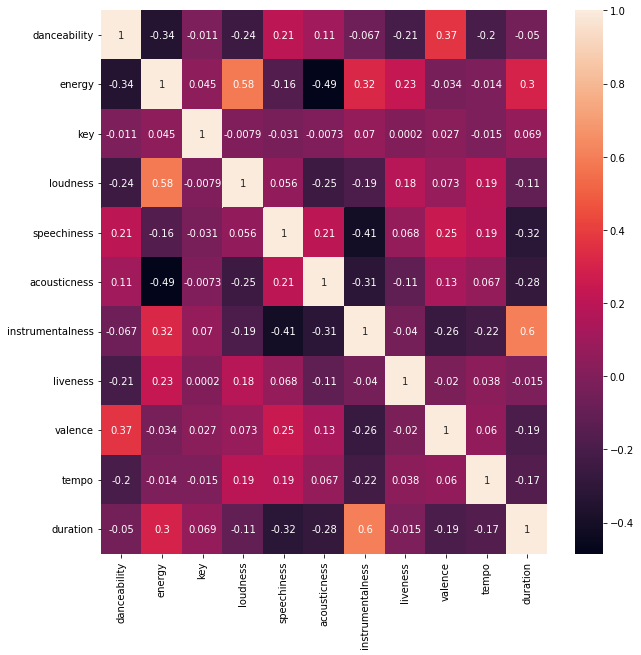

In [7]:
# feature의 상관관계 확인
plt.figure(figsize = (10,10))

df = train.corr()
sns.heatmap(df, annot=True)

## 2. Standardization Scaling

In [9]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4J/test.csv')
test

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,TEST_00000,0.8861,0.6821,2,0.7241,0.3103,0.1451,0.0000,0.5087,0.8863,0.9648,279
1,TEST_00001,0.8495,0.3883,1,0.4495,0.4661,0.6234,0.0004,0.1347,0.4062,0.9051,151
2,TEST_00002,0.2479,0.7549,3,0.7683,0.3131,0.5718,0.0000,0.1250,0.6357,0.3234,196
3,TEST_00003,0.6344,0.9804,1,0.6599,0.0931,0.0020,0.6016,0.8799,0.8790,0.2946,207
4,TEST_00004,0.6237,0.6926,6,0.6716,0.0269,0.0283,0.0001,0.1580,0.9288,0.3642,196
...,...,...,...,...,...,...,...,...,...,...,...,...
16917,TEST_16917,0.5461,0.8686,1,0.6351,0.0656,0.0010,0.8888,0.0047,0.8250,0.2672,161
16918,TEST_16918,0.8443,0.4194,4,0.5065,0.4315,0.1637,0.0241,0.0749,0.9482,0.9186,289
16919,TEST_16919,0.3373,0.9202,10,0.7272,0.4502,0.0791,0.0001,0.1881,0.0992,0.5953,212
16920,TEST_16920,0.4017,0.9741,9,0.6272,0.0768,0.0001,0.8718,0.6649,0.4463,0.4841,617


In [10]:
# ID, genre = 문자열 데이터
X = train.drop(["ID", "genre"], axis = 1)
y = train[['genre']]
test = test.drop(["ID"], axis = 1)

In [20]:
# Min-Max와 방법은 동일, 결과는 다름
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

,0,1,2,3,4,5,6,7,8,9,10
count,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04
mean,3.079214e-17,2.281418e-17,-5.542586e-17,1.896166e-16,-5.640561e-17,-4.366886e-17,-1.931507e-17,5.094700e-17,-2.233830e-16,4.814772e-17,6.214415e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-2.246766e+00,-2.334556e+00,-1.466757e+00,-2.497073e+00,-9.783792e-01,-6.567568e-01,-7.753762e-01,-1.274293e+00,-1.411878e+00,-2.234391e+00,-2.190849e+00
25%,-8.418137e-01,-8.438870e-01,-1.193528e+00,-7.197277e-01,-7.547554e-01,-6.431613e-01,-7.753762e-01,-7.319175e-01,-8.946539e-01,-8.158840e-01,-6.959686e-01
50%,3.664279e-02,2.152150e-01,1.726153e-01,6.861471e-02,-5.137768e-01,-5.252116e-01,-7.591147e-01,-4.860618e-01,-1.474741e-01,-9.030926e-02,-2.591531e-01
75%,8.886920e-01,9.220102e-01,9.923012e-01,7.611549e-01,6.453789e-01,2.159241e-01,1.261064e+00,6.953026e-01,8.275640e-01,7.014520e-01,4.882868e-01
max,1.879380e+00,1.301222e+00,1.538759e+00,2.266822e+00,2.633226e+00,3.017321e+00,1.726393e+00,2.653116e+00,2.082882e+00,2.235222e+00,6.244545e+00


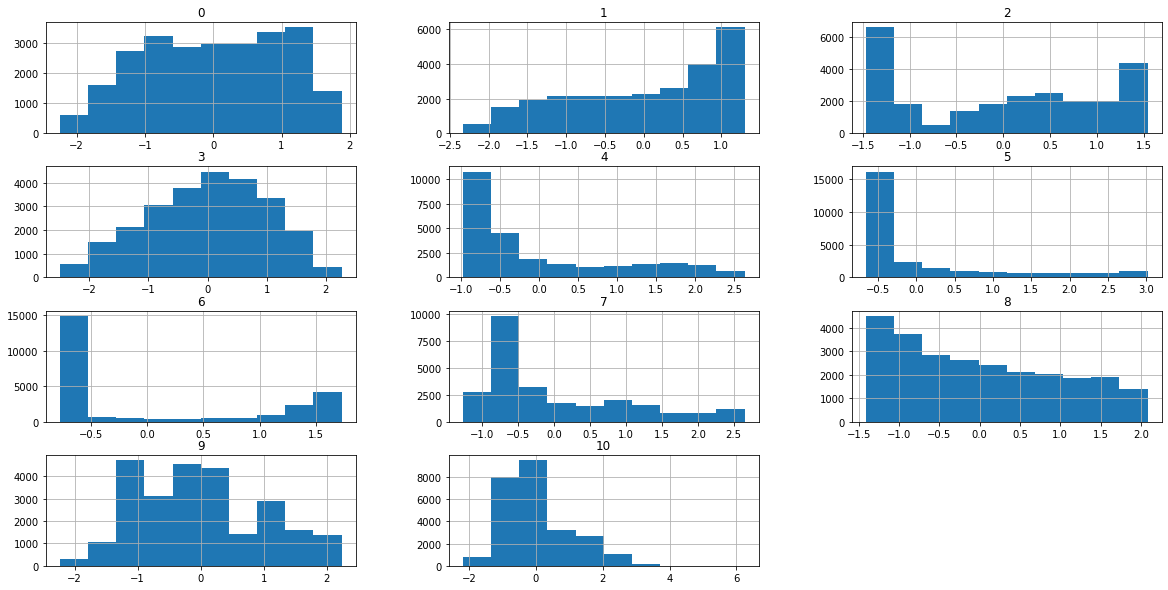

In [21]:
# 평균과 표준편차 포함하는 결과
pd.DataFrame(X_scaled).hist(figsize=(20,10))
pd.DataFrame(X_scaled).describe()

In [23]:
# 자료 통합 및 저장장
X_scaled = pd.DataFrame(X_scaled)
# Scaling 후 : 칼럼명 원래대로 추가
X_scaled.columns=['danceability',	'energy',	'key',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'duration']
train_new = pd.concat([X_scaled, y], axis=1)
train_new.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,-0.868221,1.021630,1.265530,1.573329,0.390480,-0.627361,-0.774876,1.748633,1.349681,0.160029,-0.763918,trap
1,0.370861,-0.169450,1.265530,-1.150123,-0.484129,-0.656757,1.010137,-0.647086,0.042641,-0.897154,2.517052,techno
2,-0.603322,-1.932075,0.719073,-1.325045,-0.893051,2.187264,-0.775376,0.730649,0.087723,-1.220882,-0.996886,Trap Metal
3,-0.951569,1.192876,-0.920299,1.912688,2.484987,-0.520435,-0.021093,-0.277124,-1.210231,0.166782,-0.074720,trap
4,-1.943495,1.101981,-0.100613,1.173915,-0.477259,0.292353,-0.771624,-0.577570,-1.017669,-0.837271,-0.239739,Dark Trap


## 3. Random Forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [26]:
# 스케일링 된 데이터로 X, y 다시 나누기기
X = train_new.drop(["genre"], axis = 1)
y = train_new[['genre']]

In [27]:
# 검증 데이터 생성
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify = y, test_size = 0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(20306, 11) (5077, 11) (20306, 1) (5077, 1)


In [28]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [29]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Vaild set Score: {:.3f}".format(grid_search.score(X_valid, y_valid)))

Best Parameter: {'n_estimators': 10}
Best Cross-validity Score: 0.626
Vaild set Score: 0.630


In [30]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=1, high=20)}
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f506305a220>},
                   return_train_score=True)

In [31]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Valid set Score: {:.3f}".format(random_search.score(X_valid, y_valid)))

Best Parameter: {'n_estimators': 19}
Best Cross-validity Score: 0.645
Valid set Score: 0.640


특성 중요도:
[0.10309618 0.08060017 0.03045161 0.08462309 0.07184892 0.06922923
 0.0816977  0.05138838 0.0724147  0.22147726 0.13317276]


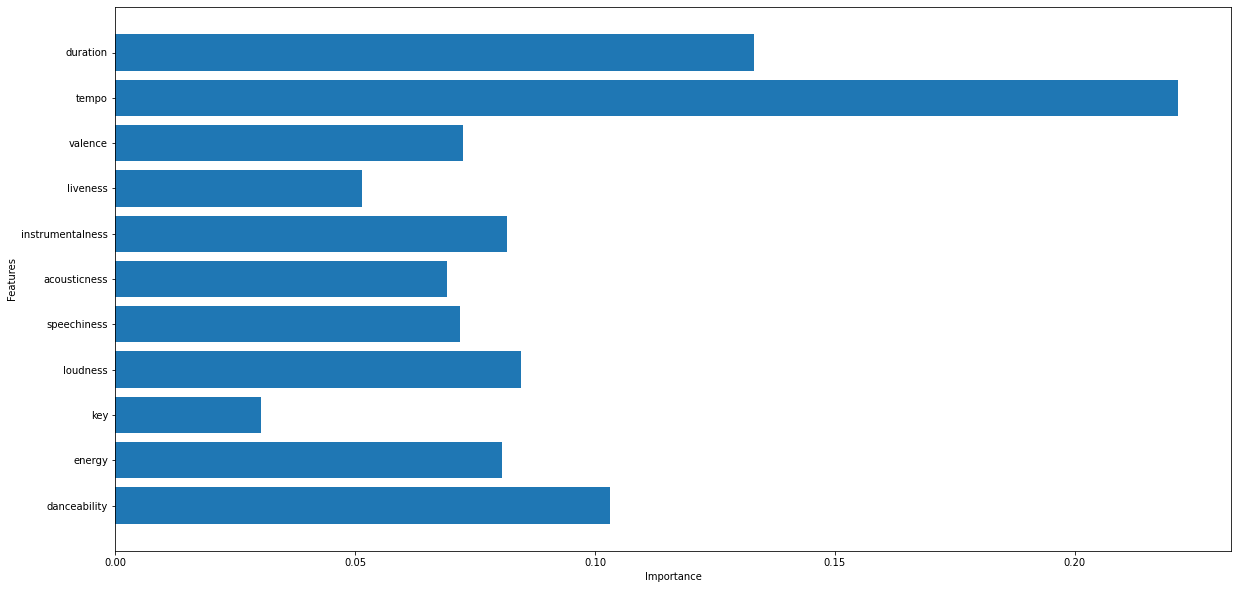

In [32]:
# 변수 중요도 시각화
Forest = RandomForestClassifier( n_estimators=19)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_forest(Forest)

In [33]:
# 모델평가
from sklearn.metrics import confusion_matrix
pred_train = Forest.predict(X_train)
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test = Forest.predict(X_valid)
confusion_test = confusion_matrix(y_valid, pred_test)
print("검증 데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[2013    0    2    0    8    5   38   88    1    0    0    0    0    1
     1]
 [   1  787    0    7    0    3    0    0    0    1    0    0    0    0
     0]
 [  16    0 1344    1   15   27    2   53    0    0    0    0    0    0
     0]
 [   0    6    0  206    0    3    0    0    1    0    0    0    0    0
     0]
 [   7    0   16    0  803   10    4   56    0    0    0    0    0    0
     0]
 [   7    0   22    2    7  991    0   17    0    0    0    0    0    0
     0]
 [  54    0    3    0    1    0  792  100    0    0    0    0    0    0
     0]
 [  78    1   58    1   43   12   60 2532    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1399    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 1403    0    0    0    0
     1]
 [   0    0    0    0    0    0    0    0    0    0 1414    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0 1438    9    0
     0]
 [   0    0    0    0    0 

In [34]:
val_pred = Forest.predict(X_valid)

# Macro f1 score을 사용하기 위해 average 인자 값을 "macro" 로 설정
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.6081705573590106입니다.


In [35]:
# 예측
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4J/sample_submission.csv")

pred = Forest.predict(test)
submission["genre"] = pred
submission

,ID,genre
0,TEST_00000,dnb
1,TEST_00001,dnb
2,TEST_00002,hardstyle
3,TEST_00003,psytrance
4,TEST_00004,hardstyle
...,...,...
16917,TEST_16917,psytrance
16918,TEST_16918,dnb
16919,TEST_16919,hardstyle
16920,TEST_16920,hardstyle


## 4. Gradiant Boosting

In [43]:
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("검증용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_valid, y_valid)))

학습용 데이터 세트 정확도: 0.751
검증용 데이터 세트 정확도: 0.676


In [41]:
# 나무 깊이 제한
gbrt2 = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

In [42]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("검증용 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_valid, y_valid))) # 오히려 감소

학습용 데이터 세트 정확도: 0.810
검증용 데이터 세트 정확도: 0.671


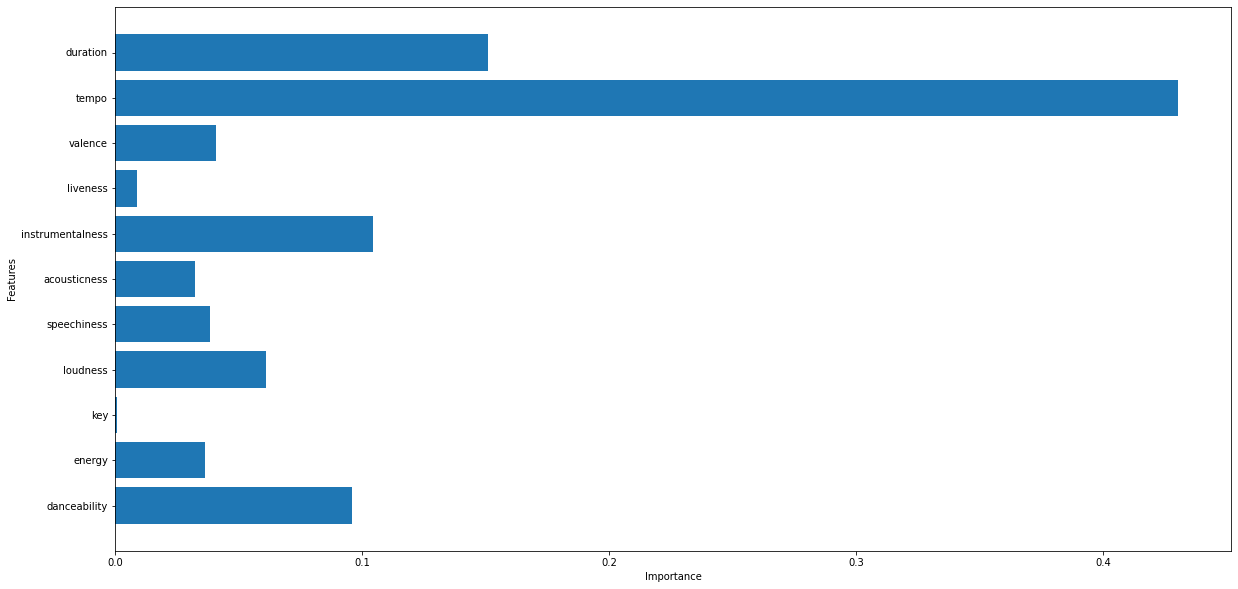

In [38]:
def plot_feature_importances_gbrt(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_gbrt(gbrt)

In [45]:
val_pred = gbrt.predict(X_valid)

# Macro f1 score을 사용하기 위해 average 인자 값을 "macro" 로 설정
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.6433911374887321입니다.


In [57]:
# 예측
pred2 = gbrt.predict(test)
submission["genre"] = pred2
submission

,ID,genre
0,TEST_00000,psytrance
1,TEST_00001,psytrance
2,TEST_00002,psytrance
3,TEST_00003,psytrance
4,TEST_00004,psytrance
...,...,...
16917,TEST_16917,psytrance
16918,TEST_16918,Hiphop
16919,TEST_16919,psytrance
16920,TEST_16920,psytrance
